In [ ]:
from keras.models import Model, Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
#zipfile1= '/content/drive/MyDrive/facial_expression.zip'

In [ ]:
#unzipdirectory='/content/drive/MyDrive/'

In [ ]:
#with zipfile.ZipFile(zipfile1,'r') as zip_ref:
  #zip_ref.extractall(unzipdirectory)

In [ ]:
import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(48, 48),   # Resize images to this size
    batch_size=32,                # Batch size for training
    class_mode='categorical'              # Set to 'categorical' for multi-class classification
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
import keras
train_ds = keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset/train/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(48,48),
  batch_size=32)

Found 32298 files belonging to 7 classes.
Using 25839 files for training.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset/test/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(48,48),
  batch_size=32)

Found 3589 files belonging to 7 classes.
Using 717 files for validation.


In [ ]:
val_ds=test_ds

In [ ]:
class_names = train_ds.class_names
print(class_names)

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']


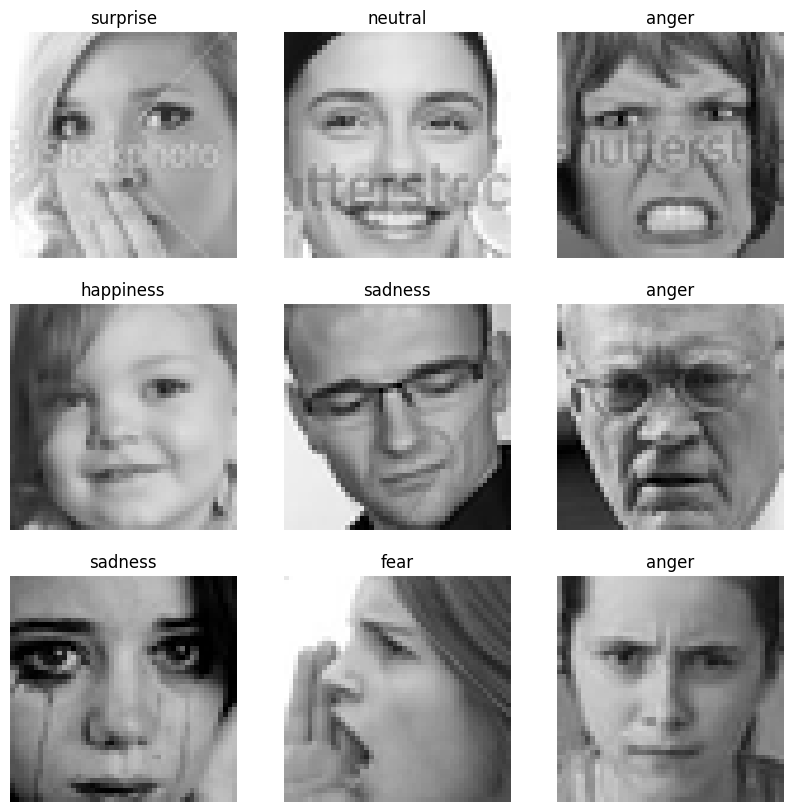

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(48, 48),
  batch_size=32)

Found 32298 files belonging to 7 classes.
Using 25839 files for training.


In [ ]:
num_classes = 7

model = tf.keras.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',
  input_shape=(48,48,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
val_ds=test_ds

In [ ]:
model.fit(train_ds,
  validation_data=val_ds,
  epochs=1
)


589/808 [====================>.........] - ETA: 16:23 - loss: 1.7245 - accuracy: 0.3083

In [ ]:
!cd "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
model.save('modelcnn.h5')

In [ ]:
from tensorflow import keras
model_path="/content/modelcnn.h5"
loaded_model=keras.models.load_model(model_path)

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

image=cv2.imread("/content/drive/MyDrive/Dataset/test/disgust/108203469.png/")
image_fromarray=Image.fromarray(image,'L')
resize_image=image_fromarray.resize((128,128))
expand_input=np.expand_dims(resize_image, axis=0)
input_data=np.array(expand_input)
input_data=input_data/255

pred=loaded_model.predict(input_data)
result=pred.argmax()
result